# User Type Analysis

## Loading Libraries and Data

In [175]:
import re # for regular expressions
import pandas as pd 
pd.set_option("display.max_colwidth", 200)
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk # for text manipulation
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [176]:
df=pd.read_csv("profiles.csv")

Let's read train and test datasets.

## Text PreProcessing and Cleaning

### Data Inspection

Let's check out a few non racist/sexist tweets.

In [177]:
df_sub1 = pd.read_csv('dataset1.csv')
df['cluster'] = df_sub1['cluster']

In [178]:
df.dropna(inplace = True)
df.head()
len(df)

4407

In [179]:
combi = df

In [180]:
combi[combi['cluster'] == 1].head(10)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,cluster
22,30,fit,mostly anything,socially,never,graduated from college/university,"i tend to think the same way a comedian does about nearly\neverything and i laugh more than any other particular activity.\nadventures are a key ingredient to my happiness, whether it be a\nnew re...","i'm a supply and demand manager for a sustainable soap manufacturer\nhere in sf. the typical corporation sort of sucks the life out of\nmy being, so working for companies with a positive mission i...","making predictions, planning anything (i'm pretty thorough when\nmotivated), writing, making people laugh (yes, often at me), and\novereating/drinking followed by an appropriately guilty run throu...",that i'm smiling. pretty much at all times.,...,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and somewhat serious about it,m,sagittarius but it doesn&rsquo;t matter,no,"english, spanish (poorly)",single,1
94,29,fit,mostly anything,socially,sometimes,graduated from college/university,"my names josh, and i create art for a living. i work as a\nconceptual artist at a north beach studio. in my spare time i like\nto play music, adventure around the city, check out music, or just\nh...",living it,everything,i honestly couldn't say....,...,doesn&rsquo;t want kids,straight,likes dogs and likes cats,agnosticism and very serious about it,m,libra,no,english (fluently),single,1
168,26,fit,mostly anything,socially,never,graduated from college/university,"i recently moved to san francisco from london with my work (it's a\nhard life!). i am interested in loads of different things, but my\nmain passions are probably sailing, reading and music. i'm no...","i'm a civil engineer working in infrastructure. my favourite type\nof project has to be designing public space in cities, as your work\ntouches millions of people and hopefully improves their day....","erm... holistic thinking? organising stuff, winding up my sisters,\novercomplicating things, making tea, not having a clue wtf is going\non in movies, having high expectations of myself, trying st...",hmm dunno. i'd like to say my lovely smile? but probably that my\nhair is a mess (it's hard to control) and ive already forgotten\ntheir name...,...,"doesn&rsquo;t have kids, but wants them",straight,likes dogs,agnosticism and laughing about it,f,sagittarius but it doesn&rsquo;t matter,no,english,single,1
176,27,athletic,mostly anything,socially,never,graduated from college/university,"i'm a pretty laid back guy, currently work full time as a sales\nengineer at a small tech startup in sf. my job is pretty amazing as\ni have a lot of variety in my day to day activities, and i get...","currently working full time while having as much fun as possible,\ninterested in seeing what fun adventure life will throw at me next.","many things i think?<br />\n<br />\ni know i'm not good at writing okcupid profiles, or so i've been\ntold.",smile.,...,"doesn&rsquo;t have kids, but wants them",straight,likes dogs and has cats,judaism but not too serious about it,m,virgo but it doesn&rsquo;t matter,no,"english, russian",single,1
201,28,fit,mostly anything,socially,never,graduated from college/university,"socially awkward but if you give me a few drinks i think we'll have\na few good laugh. i hate to read profiles that feels like it have\nbeen copied and paste, either that or i've read one too many...",i walk to my car every morning hoping i didn't get another ticket\nfor street cleaning day.<br />\n<br />\ni sing to myself as i do a very boring 40 minute commute to\nwork.<br />\n<br />\ni try t...,baseball and short stops.,my smile and my dimple.,...,"doesn&rsquo;t have kids, but might want them",straight,likes dogs,other but not too serious about it,m,gemini but it doesn&rsquo;t matter,no,"english (fluently), vietnamese (fluently), c++ (fluently)",sin

In [181]:
len(combi)

4407


### Data Cleaning

In [182]:
combi['text'] = combi['essay0'] + combi['essay1'] + combi['essay2'] + combi['essay3'] + combi['essay4'] + combi['essay5'] + combi['essay6'] + combi['essay7'] + combi['essay8'] + combi['essay9'] 

In [183]:
combi = combi.dropna()
len(combi), len(df)

(4407, 4407)

In [184]:
combi = combi.reset_index(drop=True)

In [185]:
combi['text'] = combi['text'].astype(str)

Given below is a user-defined function to remove unwanted text patterns from the tweets.

In [186]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    

__1. Removing Twitter Handles (@user)__

In [187]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['text'], "@[\w]*") 
combi.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,pets,religion,sex,sign,smokes,speaks,status,cluster,text,tidy_tweet
0,22,a little extra,strictly anything,socially,never,working on college/university,"about me:<br />\n<br />\ni would love to think that i was some some kind of intellectual:\neither the dumbest smart guy, or the smartest dumb guy. can't say i\ncan tell the difference. i love to t...","currently working as an international agent for a freight\nforwarding company. import, export, domestic you know the\nworks.<br />\nonline classes and trying to better myself in my free time. perh...","making people laugh.<br />\nranting about a good salting.<br />\nfinding simplicity in complexity, and complexity in simplicity.","the way i look. i am a six foot half asian, half caucasian mutt. it\nmakes it tough not to notice me, and for me to blend in.",...,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single,0,"about me:<br />\n<br />\ni would love to think that i was some some kind of intellectual:\neither the dumbest smart guy, or the smartest dumb guy. can't say i\ncan tell the difference. i love to t...","about me:<br />\n<br />\ni would love to think that i was some some kind of intellectual:\neither the dumbest smart guy, or the smartest dumb guy. can't say i\ncan tell the difference. i love to t..."
1,33,athletic,mostly anything,socially,never,graduated from masters program,"i relocated to san francisco half a year ago. that was an awesome\nfew months that let me explore the diverse parts of the city, find\na gorgeous victorian house to live in, meet my awesome roomma...","i left my comfort zone far behind in europe, and enjoyed a few\nmonths of a fast-paced adventure here. at the same time i was doing\nmy best to settle down and it seems it worked well ;-)<br />\n<...","listening, connecting emotionally, analyzing tough engineering\ntasks, making people laugh, dancing boogie woogie, horseback\nriding, yoga, swimming, playing chess, and guitar hero, driving\ndynam...","cheerful, open, curious, direct, active, sporty, energetic.",...,likes dogs and likes cats,catholicism but not too serious about it,m,pisces and it&rsquo;s fun to think about,no,english (fluently),single,0,"i relocated to san francisco half a year ago. that was an awesome\nfew months that let me explore the diverse parts of the city, find\na gorgeous victorian house to live in, meet my awesome roomma...","i relocated to san francisco half a year ago. that was an awesome\nfew months that let me explore the diverse parts of the city, find\na gorgeous victorian house to live in, meet my awesome roomma..."
2,30,fit,mostly anything,socially,never,graduated from college/university,"i tend to think the same way a comedian does about nearly\neverything and i laugh more than any other particular activity.\nadventures are a key ingredient to my happiness, whether it be a\nnew re...","i'm a supply and demand manager for a sustainable soap manufacturer\nhere in sf. the typical corporation sort of sucks the life out of\nmy being, so working for companies with a positive mission i...","making predictions, planning anything (i'm pretty thorough when\nmotivated), writing, making people laugh (yes, often at me), and\novereating/drinking followed by an appropriately guilty run throu...",that i'm smiling. pretty much at all times.,...,likes dogs and likes cats,agnosticism and somewhat serious about it,m,sagittarius but it doesn&rsquo;t matter,no,"english, spanish (poorly)",single,1,"i tend to think the same way a comedian does about nearly\neverything and i laugh more than any other particular activity.\nadventures are a key ingredient to my happiness, whether it be a\nnew re...","i tend to think the same way a comedian does about nearly\neverything and i laugh more than any other particular activity.\nadventures are a key ingredient to my happiness, whether it be a\nnew re..."
3,29,fit,mostly anything,soc

In [188]:
combi = combi[['tidy_tweet', 'text', 'cluster']]

__2. Removing Punctuations, Numbers, and Special Characters__

In [189]:
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
combi.head(10)

,tidy_tweet,text,cluster
0,about me br br i would love to think that i was some some kind of intellectual either the dumbest smart guy or the smartest dumb guy can t say i can tell the difference i love to talk ...,"about me:<br />\n<br />\ni would love to think that i was some some kind of intellectual:\neither the dumbest smart guy, or the smartest dumb guy. can't say i\ncan tell the difference. i love to t...",0
1,i relocated to san francisco half a year ago that was an awesome few months that let me explore the diverse parts of the city find a gorgeous victorian house to live in meet my awesome roommate...,"i relocated to san francisco half a year ago. that was an awesome\nfew months that let me explore the diverse parts of the city, find\na gorgeous victorian house to live in, meet my awesome roomma...",0
2,i tend to think the same way a comedian does about nearly everything and i laugh more than any other particular activity adventures are a key ingredient to my happiness whether it be a new resta...,"i tend to think the same way a comedian does about nearly\neverything and i laugh more than any other particular activity.\nadventures are a key ingredient to my happiness, whether it be a\nnew re...",1
3,my names josh and i create art for a living i work as a conceptual artist at a north beach studio in my spare time i like to play music adventure around the city check out music or just hang...,"my names josh, and i create art for a living. i work as a\nconceptual artist at a north beach studio. in my spare time i like\nto play music, adventure around the city, check out music, or just\nh...",1
4,one day i will mod r hotchickswithspreadsheets br br i lt data and jokes about fart jokes my hobbies include wikipedia and chortling i write raps that no one will hear i do not have ...,one day i will mod r/hotchickswithspreadsheets.<br />\n<br />\ni &lt;3 data and jokes about fart jokes. my hobbies include\nwikipedia and chortling. i write raps that no one will hear. i do\nnot h...,0
5,i m a glass half full kind of girl am emotionally wired to be very logical and abhor drama i m eternally curious and work in left brain things but enjoy right brain activities much more d...,"i'm a glass-half-full kind of girl, am emotionally wired to be very\nlogical, and abhor drama. i'm eternally curious and work in\nleft-brain things, but enjoy right-brain activities much more .......",0
6,hey br i m angel here s a little about myself i am a born an raised californian whoo been in the bay area for a while now i m a bit of a tomboy i love video games football go niners h...,"hey<br />\ni'm angel, here's a little about myself. i am a born an raised\ncalifornian, whoo. been in the bay area for a while now. i'm a bit\nof a tomboy. i love video games, football (go niners)...",2
7,i am single girls come get me hahaha br br i am a tall white guy who is looking for a younger woman ask me anything if you would like to know more i try to avoid watching tv and ea...,"i am single girls!!! come get me!! hahaha<br />\n<br />\ni am a tall white guy who is looking for a younger woman. ask me\nanything if you would like to know more :)i try to avoid watching tv, and...",0
8,ill matic drastically fantastic orgasmic incomparable to plastic seen as drastic and spastic yet my prophetic facts are prophylactic br br i don t i do enjoying it producing music ...,"ill-matic, drastically fantastic, orgasmic, incomparable to\n""plastic"", seen as drastic and spastic, yet my prophetic facts are\nprophylactic.<br />\n<br />\ni don't, i do.enjoying it.producing mu...",0
9,i am a good guy looking to find that someone special br i think that the initial meeting chemistry is important br lets go to the wine country explore a new area try a new restaurant and...,"i am a good guy looking to find that someone special.<br />\ni think that the initial meeting chemistry is important.<br />\nlets go to the wine country, explore a new area, try a new\nrestaurant ...",2


In [190]:
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace('#','')
combi.head(10)

,tidy_tweet,text,cluster
0,about me br br i would love to think that i was some some kind of intellectual either the dumbest smart guy or the smartest dumb guy can t say i can tell the difference i love to talk ...,"about me:<br />\n<br />\ni would love to think that i was some some kind of intellectual:\neither the dumbest smart guy, or the smartest dumb guy. can't say i\ncan tell the difference. i love to t...",0
1,i relocated to san francisco half a year ago that was an awesome few months that let me explore the diverse parts of the city find a gorgeous victorian house to live in meet my awesome roommate...,"i relocated to san francisco half a year ago. that was an awesome\nfew months that let me explore the diverse parts of the city, find\na gorgeous victorian house to live in, meet my awesome roomma...",0
2,i tend to think the same way a comedian does about nearly everything and i laugh more than any other particular activity adventures are a key ingredient to my happiness whether it be a new resta...,"i tend to think the same way a comedian does about nearly\neverything and i laugh more than any other particular activity.\nadventures are a key ingredient to my happiness, whether it be a\nnew re...",1
3,my names josh and i create art for a living i work as a conceptual artist at a north beach studio in my spare time i like to play music adventure around the city check out music or just hang...,"my names josh, and i create art for a living. i work as a\nconceptual artist at a north beach studio. in my spare time i like\nto play music, adventure around the city, check out music, or just\nh...",1
4,one day i will mod r hotchickswithspreadsheets br br i lt data and jokes about fart jokes my hobbies include wikipedia and chortling i write raps that no one will hear i do not have ...,one day i will mod r/hotchickswithspreadsheets.<br />\n<br />\ni &lt;3 data and jokes about fart jokes. my hobbies include\nwikipedia and chortling. i write raps that no one will hear. i do\nnot h...,0
5,i m a glass half full kind of girl am emotionally wired to be very logical and abhor drama i m eternally curious and work in left brain things but enjoy right brain activities much more d...,"i'm a glass-half-full kind of girl, am emotionally wired to be very\nlogical, and abhor drama. i'm eternally curious and work in\nleft-brain things, but enjoy right-brain activities much more .......",0
6,hey br i m angel here s a little about myself i am a born an raised californian whoo been in the bay area for a while now i m a bit of a tomboy i love video games football go niners h...,"hey<br />\ni'm angel, here's a little about myself. i am a born an raised\ncalifornian, whoo. been in the bay area for a while now. i'm a bit\nof a tomboy. i love video games, football (go niners)...",2
7,i am single girls come get me hahaha br br i am a tall white guy who is looking for a younger woman ask me anything if you would like to know more i try to avoid watching tv and ea...,"i am single girls!!! come get me!! hahaha<br />\n<br />\ni am a tall white guy who is looking for a younger woman. ask me\nanything if you would like to know more :)i try to avoid watching tv, and...",0
8,ill matic drastically fantastic orgasmic incomparable to plastic seen as drastic and spastic yet my prophetic facts are prophylactic br br i don t i do enjoying it producing music ...,"ill-matic, drastically fantastic, orgasmic, incomparable to\n""plastic"", seen as drastic and spastic, yet my prophetic facts are\nprophylactic.<br />\n<br />\ni don't, i do.enjoying it.producing mu...",0
9,i am a good guy looking to find that someone special br i think that the initial meeting chemistry is important br lets go to the wine country explore a new area try a new restaurant and...,"i am a good guy looking to find that someone special.<br />\ni think that the initial meeting chemistry is important.<br />\nlets go to the wine country, explore a new area, try a new\nrestaurant ...",2


__3. Removing Short Words__

In [191]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

Let’s take another look at the first few rows of the combined dataframe.

In [192]:
combi.head(10)

,tidy_tweet,text,cluster
0,about would love think that was some some kind intellectual either the dumbest smart guy the smartest dumb guy can say can tell the difference love talk about ideas and concepts forge odd metaphor...,"about me:<br />\n<br />\ni would love to think that i was some some kind of intellectual:\neither the dumbest smart guy, or the smartest dumb guy. can't say i\ncan tell the difference. i love to t...",0
1,relocated san francisco half year ago that was awesome few months that let explore the diverse parts the city find gorgeous victorian house live meet awesome roommates who became best friends find...,"i relocated to san francisco half a year ago. that was an awesome\nfew months that let me explore the diverse parts of the city, find\na gorgeous victorian house to live in, meet my awesome roomma...",0
2,tend think the same way comedian does about nearly everything and laugh more than any other particular activity adventures are key ingredient happiness whether new restaurant hike sport usually fo...,"i tend to think the same way a comedian does about nearly\neverything and i laugh more than any other particular activity.\nadventures are a key ingredient to my happiness, whether it be a\nnew re...",1
3,names josh and create art for living work conceptual artist north beach studio spare time like play music adventure around the city check out music just hang out home prefer meeting people real li...,"my names josh, and i create art for a living. i work as a\nconceptual artist at a north beach studio. in my spare time i like\nto play music, adventure around the city, check out music, or just\nh...",1
4,one day will mod hotchickswithspreadsheets data and jokes about fart jokes hobbies include wikipedia and chortling write raps that one will hear not have booty like minaj presently holyshitwhatami...,one day i will mod r/hotchickswithspreadsheets.<br />\n<br />\ni &lt;3 data and jokes about fart jokes. my hobbies include\nwikipedia and chortling. i write raps that no one will hear. i do\nnot h...,0
5,glass half full kind girl emotionally wired very logical and abhor drama eternally curious and work left brain things but enjoy right brain activities much more drawing creating things over analyz...,"i'm a glass-half-full kind of girl, am emotionally wired to be very\nlogical, and abhor drama. i'm eternally curious and work in\nleft-brain things, but enjoy right-brain activities much more .......",0
6,hey angel here little about myself born raised californian whoo been the bay area for while now bit tomboy love video games football niners hiking that kinda stuff got love the earth try stay cons...,"hey<br />\ni'm angel, here's a little about myself. i am a born an raised\ncalifornian, whoo. been in the bay area for a while now. i'm a bit\nof a tomboy. i love video games, football (go niners)...",2
7,single girls come get hahaha tall white guy who looking for younger woman ask anything you would like know more try avoid watching and eat healthy can this can challenge when you are the drive thr...,"i am single girls!!! come get me!! hahaha<br />\n<br />\ni am a tall white guy who is looking for a younger woman. ask me\nanything if you would like to know more :)i try to avoid watching tv, and...",0
8,ill matic drastically fantastic orgasmic incomparable plastic seen drastic and spastic yet prophetic facts are prophylactic don enjoying producing music entertaining struggling with maturity and i...,"ill-matic, drastically fantastic, orgasmic, incomparable to\n""plastic"", seen as drastic and spastic, yet my prophetic facts are\nprophylactic.<br />\n<br />\ni don't, i do.enjoying it.producing mu...",0
9,good guy looking find that someone special think that the initial meeting chemistry important lets the wine country explore new area try new restaurant and enjoy nice glass wine together can email...,"i am a good guy looking to find that someone special.<br />\ni think that the initial meeting chemistry is important.<

__4. Text Normalization__

Here we will use nltk's PorterStemmer() function to normalize the tweets. But before that we will have to tokenize the tweets. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

In [193]:
combi = combi.reset_index(drop = True)

In [194]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing

Now we can normalize the tokenized tweets.

In [18]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

In [195]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
tokenized_tweet.apply(lambda x: [lemmatizer.lemmatize(i) for i in x]) # stemming
#lemmatized_output = ' '.join([lemmatizer.lemmatize(token) for token in tokens])

0       [about, would, love, think, that, wa, some, some, kind, intellectual, either, the, dumbest, smart, guy, the, smartest, dumb, guy, can, say, can, tell, the, difference, love, talk, about, idea, and...
1       [relocated, san, francisco, half, year, ago, that, wa, awesome, few, month, that, let, explore, the, diverse, part, the, city, find, gorgeous, victorian, house, live, meet, awesome, roommate, who,...
2       [tend, think, the, same, way, comedian, doe, about, nearly, everything, and, laugh, more, than, any, other, particular, activity, adventure, are, key, ingredient, happiness, whether, new, restaura...
3       [name, josh, and, create, art, for, living, work, conceptual, artist, north, beach, studio, spare, time, like, play, music, adventure, around, the, city, check, out, music, just, hang, out, home, ...
4       [one, day, will, mod, hotchickswithspreadsheets, data, and, joke, about, fart, joke, hobby, include, wikipedia, and, chortling, write, rap, that, one, will, hea

Now let’s stitch these tokens back together.

In [196]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
combi['tidy_tweet'] = tokenized_tweet

In [197]:
combi.head()

,tidy_tweet,text,cluster
0,about would love think that was some some kind intellectual either the dumbest smart guy the smartest dumb guy can say can tell the difference love talk about ideas and concepts forge odd metaphor...,"about me:<br />\n<br />\ni would love to think that i was some some kind of intellectual:\neither the dumbest smart guy, or the smartest dumb guy. can't say i\ncan tell the difference. i love to t...",0
1,relocated san francisco half year ago that was awesome few months that let explore the diverse parts the city find gorgeous victorian house live meet awesome roommates who became best friends find...,"i relocated to san francisco half a year ago. that was an awesome\nfew months that let me explore the diverse parts of the city, find\na gorgeous victorian house to live in, meet my awesome roomma...",0
2,tend think the same way comedian does about nearly everything and laugh more than any other particular activity adventures are key ingredient happiness whether new restaurant hike sport usually fo...,"i tend to think the same way a comedian does about nearly\neverything and i laugh more than any other particular activity.\nadventures are a key ingredient to my happiness, whether it be a\nnew re...",1
3,names josh and create art for living work conceptual artist north beach studio spare time like play music adventure around the city check out music just hang out home prefer meeting people real li...,"my names josh, and i create art for a living. i work as a\nconceptual artist at a north beach studio. in my spare time i like\nto play music, adventure around the city, check out music, or just\nh...",1
4,one day will mod hotchickswithspreadsheets data and jokes about fart jokes hobbies include wikipedia and chortling write raps that one will hear not have booty like minaj presently holyshitwhatami...,one day i will mod r/hotchickswithspreadsheets.<br />\n<br />\ni &lt;3 data and jokes about fart jokes. my hobbies include\nwikipedia and chortling. i write raps that no one will hear. i do\nnot h...,0


## Story Generation and Visualization from Tweets

In [198]:
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace('href','')
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace('ilink','')
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace('class','')
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace('interests','')

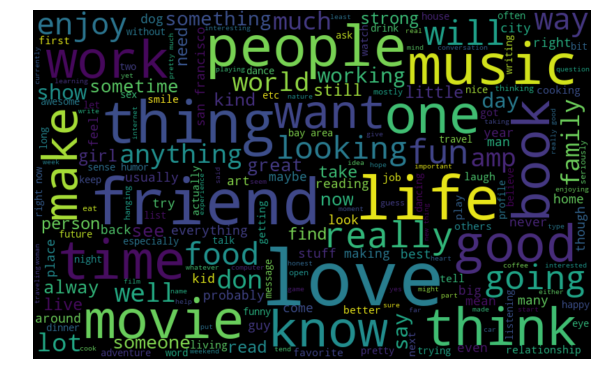

In [199]:
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

We can see most of the words are positive or neutral. Words like love, great, friend, life are the most frequent ones. It doesn’t give us any idea about the words associated with the racist/sexist tweets. Hence, we will plot separate wordclouds for both the classes (racist/sexist or not) in our train data.

__B) Words in non racist/sexist tweets__

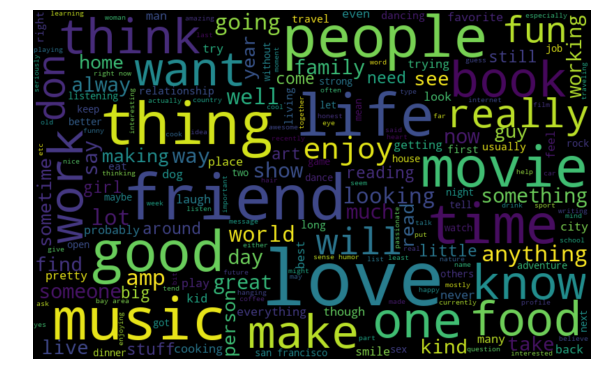

In [200]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['cluster'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Most of the frequent words are compatible with the sentiment, i.e, non-racist/sexists tweets. Similarly, we will plot the word cloud for the other sentiment. Expect to see negative, racist, and sexist terms.

__C) Racist/Sexist Tweets__

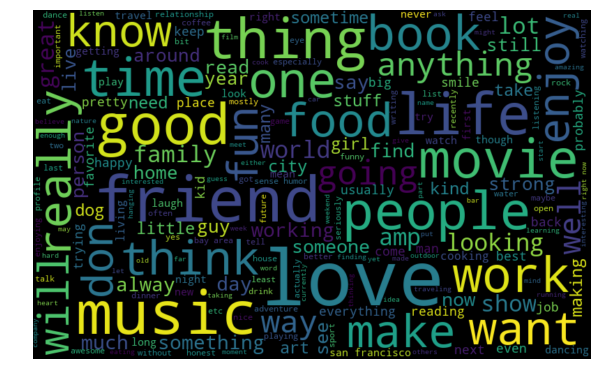

In [201]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['cluster'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

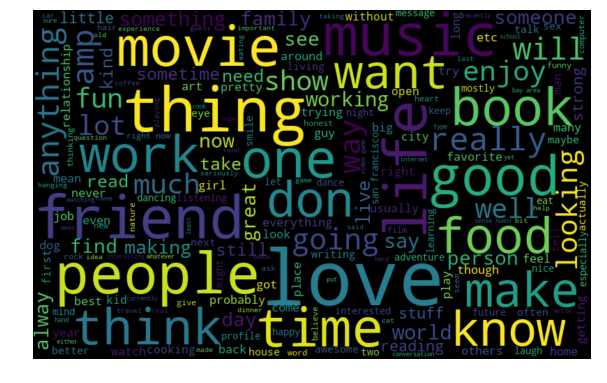

In [202]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['cluster'] == 2]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

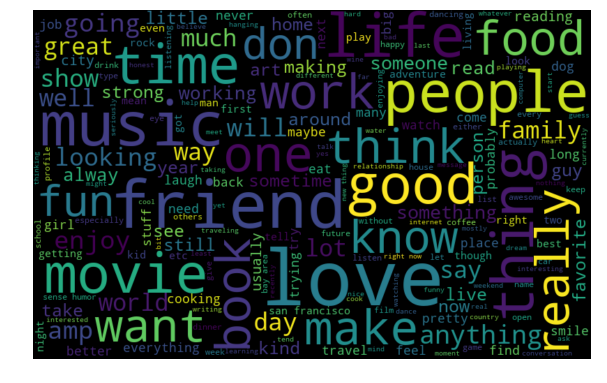

In [203]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['cluster'] == 3]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

As we can clearly see, most of the words have negative connotations. So, it seems we have a pretty good text data to work on. Next we will the hashtags/trends in our twitter data.

## Extracting Features from Cleaned Tweets

In [205]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

### Bag-of-Words Features

In [206]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=500, stop_words='english')
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])
bow.shape

(4407, 500)

### TF-IDF Features

In [208]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=500, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])
tfidf.shape

(4407, 500)

---

## Model Building

We are now done with all the pre-modeling stages required to get the data in the proper form and shape. We will be building models on the datasets with different feature sets prepared in the earlier sections — Bag-of-Words, TF-IDF. We will use the following algorithms to build models:

1. Logistic Regression
2. Naive Bayes
3. XGBoost

### 1. Logistic Regression

In [226]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

#### Bag-of-Words Features

In [227]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE

print('Original dataset shape %s' % Counter(combi['cluster']))



Original dataset shape Counter({2: 1447, 0: 1269, 1: 886, 3: 805})


In [228]:

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(bow, combi['cluster'],  
                                                          random_state=42, 
                                                          test_size=0.2)

In [233]:
lreg = LogisticRegression(random_state = 10, max_iter = 500)
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict(xvalid_bow) # predicting on the validation set

prediction_int = prediction.astype(np.int)

print(f1_score(yvalid, prediction,average = 'macro')) # calculating f1 score

print(accuracy_score(yvalid, prediction)) # calculating f1 score

0.31311655614830525
0.3344671201814059


Now let's make predictions for the test dataset and create a submission file.

In [33]:
test_pred = lreg.predict(test_bow)

test_pred_int = test_pred.astype(np.int)
test['Target'] = test_pred_int
submission = test[['id','Target']]
submission.to_csv('lreg_bow_8.csv', index=False) # writing data to a CSV file

#### TF-IDF Features

In [214]:

# splitting data into training and validation set
xtrain_tfidf, xvalid_tfidf, ytrain, yvalid = train_test_split(tfidf, combi['cluster'],  
                                                          random_state=42, 
                                                          test_size=0.3)

In [215]:
lreg = LogisticRegression()
lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict(xvalid_tfidf)
#prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction.astype(np.int)

f1_score(yvalid, prediction_int, average = 'macro')

0.2984910445174494

In [216]:
Now let's make predictions for the test dataset and create a submission file.

SyntaxError: invalid syntax (<ipython-input-216-48628ba61527>, line 1)

In [ ]:
test_pred = lreg.predict(test_bow)
#test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred.astype(np.int)
test['Target'] = test_pred_int
submission = test[['id','Target']]
submission.to_csv('lreg_tfidf.csv', index=False) # writing data to a CSV file

# Naive Bayes

# Bag of words

In [217]:

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(bow, combi['cluster'],  
                                                          random_state=42, 
                                                          test_size=0.2)

In [218]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(xtrain_bow.todense(), ytrain)
prediction = gnb.predict(xvalid_bow.todense())
prediction_int = prediction.astype(np.int)
f1_score(yvalid, prediction_int, average = 'macro')

0.2453209692835344

# tfidf  

In [219]:

# splitting data into training and validation set
xtrain_tfidf, xvalid_tfidf, ytrain, yvalid = train_test_split(tfidf, combi['cluster'],  
                                                          random_state=42, 
                                                          test_size=0.3)

In [220]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(xtrain_tfidf.todense(), ytrain)
prediction = gnb.predict(xvalid_tfidf.todense())
prediction_int = prediction.astype(np.int)
f1_score(yvalid, prediction_int, average = 'macro')

0.3051438112137646

### 3. XGBoost

In [221]:
from xgboost import XGBClassifier

In [222]:

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, combi['cluster'],  
                                                          random_state=42, 
                                                          test_size=0.2)

#### Bag-of-Words Features

In [223]:
xgb_model = XGBClassifier(max_depth=6, n_estimators=100).fit(xtrain_bow, ytrain)
prediction = xgb_model.predict(xvalid_bow)
f1_score(yvalid, prediction, average = 'macro')

0.3126559986731846

In [ ]:
test_pred = xgb_model.predict(test_bow)
test['Target'] = test_pred
submission = test[['id','Target']]
submission.to_csv('xgb_bow_1.csv', index=False)

#### TF-IDF Features

In [ ]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_tfidf, ytrain)

prediction = xgb.predict(xvalid_tfidf)
f1_score(yvalid, prediction, average = 'macro')